When a random circuit is applied to a product state, its entanglement typically increases. If all the qubits are measured in the resulting state, the state collapses into a product state, which is not entangled.

If only some qubits are measured with a given probability, and the state continues to evolve under a random circuit, then random circuit dynamics compete with each other to increase and reduce the entanglement. 

References  arXiv:1808.05953,  arXiv:1901.08092

This notebook illustrates this competition for a small number of qubits, using a random brick-work circuit.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
import sys
sys.path.append('../src')
from statevector import*

In [31]:
# Setting up parameters

# the different qubit sizes to compare
n_arr=np.arange(6,15,2)

# probability of measurement at a given site
p_arr=np.linspace(0,1.0,10)

# number of layers for each system size
nstep_arr=[50]*(len(n_arr))

# number of times each p,n is repeated to average over disorder instances
rep_arr=[100]*len(n_arr)

# initalize entanglement entropy array
ent_arr=np.zeros((len(n_arr),len(p_arr)))

In [32]:
# loop over all sizes and probability 


for i,n in enumerate(n_arr):
    for j,p in enumerate(p_arr):
        
        #print("i,j",i,j)
        
        for repeat in range(rep_arr[i]):
        
            #initialize state to product state (all 0s)

            psi=qstate(n,random=False)

            psi.random_brickwork_evolve(nsteps=nstep_arr[i],p_meas=p)
            ent_arr[i,j]+=psi.compute_ent_ee()
        
        ent_arr[i,j]=ent_arr[i,j]/repeat # average

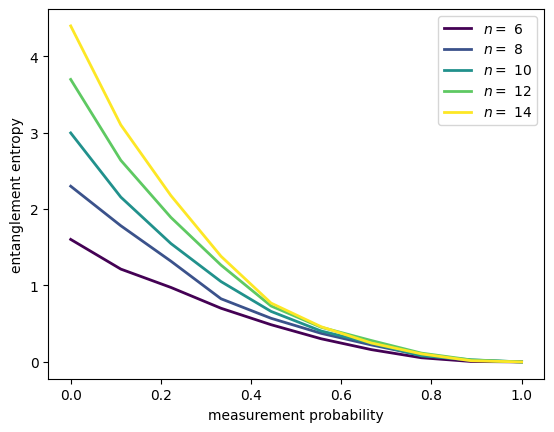

In [36]:
# plot entaglement entropy with p

cmap=colormaps['viridis'].resampled(len(n_arr))

for i,n in enumerate(n_arr):
    plt.plot(p_arr,ent_arr[i,:],"-",color=cmap(i),label="$n = $ "+str(n),lw=2,markersize=1)

plt.xlabel("measurement probability")
plt.ylabel("entanglement entropy")
plt.legend()
plt.show()


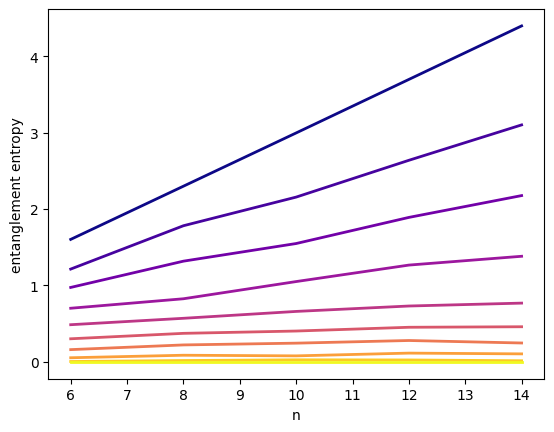

In [39]:
# plot with n


cmap=colormaps['plasma'].resampled(len(p_arr))

for i,p in enumerate(p_arr):
    plt.plot(n_arr,ent_arr[:,i],"-",color=cmap(i),label="$p = $ "+str(p),lw=2,markersize=1)

plt.xlabel("n")
plt.ylabel("entanglement entropy")
#plt.legend()
plt.show()


From the plots above, we see that when the rate of measurements is small, the half chain entanglement entropy grows linearly with the number of qubits, and as the measurement rate increases the growth slows down, and infact the entagnlement doesn't grow at all for large enough p.

Infact, as simulations for larger number of qubits for Clifford circuits have shown, a clear transition occurs at a critical p, and this phenomena is referred to as a measurement induced phase-transition.